In [47]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 5.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


## Inserção de dados

In [43]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'

dados = pd.read_csv(url)
print(dados.shape) #apresenta as dimensões do conjunto de dados(linhas, colunas)
dados.head() #1=Sim e 0=não

(7043, 18)


,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


# Mudanças de variáveis Categóricas
- 'Sim': 1,
- 'Nao': 0

In [44]:
a_mudar = {
    'Sim': 1,
    'Nao': 0
}


dados.Conjuge = dados.Conjuge.map(a_mudar)
dados.Dependentes = dados.Dependentes.map(a_mudar)
dados.TelefoneFixo = dados.TelefoneFixo.map(a_mudar)
dados.PagamentoOnline = dados.PagamentoOnline.map(a_mudar)
dados.Churn = dados.Churn.map(a_mudar)


dados

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,Sim,DSL,Sim,Nao,Sim,Sim,Sim,Sim,UmAno,1,ChequePapel,84.80,0
7039,0,1,1,72,1,Sim,FibraOptica,Nao,Sim,Sim,Nao,Sim,Sim,UmAno,1,CartaoDeCredito,103.20,0
7040,0,1,1,11,0,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.60,0
7041,1,1,0,4,1,Sim,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,74.40,1


**Informações para classificação**

X = inputs (dados de entrada)

y = outputs (dados de saída)

In [45]:
dados.shape

(7043, 18)

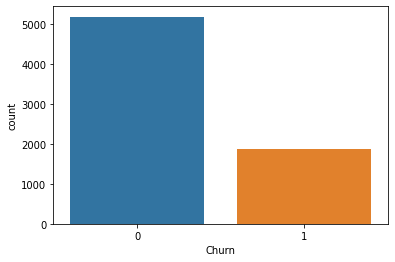

In [46]:
import seaborn as sns

sns.countplot(x = 'Churn', data = dados)

In [49]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados.drop('Churn', axis = 1)
y = dados['Churn']

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

ValueError: ignored